In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style("darkgrid")

In [39]:
numOffolds = len(os.listdir('BBC/'))
print(numOffolds)
all_folds = os.listdir('BBC/')
folder_path = all_folds[2]
print(folder_path)

len([x for x in os.listdir('BBC/'+folder_path)])


5
sport


511

In [58]:
data_need = []
data_x = []
data_y = []


path = 'BBC/'
all_folds = os.listdir(path)

for i in range (len(all_folds)):
    data_x.append(all_folds[i])
    print(f'comput No.{i+1} folder.')
    folder_path = all_folds[i]
    NumOfFiles = len([x for x in os.listdir(path + folder_path)])
    data_y.append(NumOfFiles)
    print(f'No.{i+1} has {NumOfFiles} files.')
    table = pd.DataFrame({'folder_id': all_folds[i],'file_num':[NumOfFiles]})
    data_need.append(table)

        

comput No.1 folder.
No.1 has 386 files.
comput No.2 folder.
No.2 has 510 files.
comput No.3 folder.
No.3 has 511 files.
comput No.4 folder.
No.4 has 417 files.
comput No.5 folder.
No.5 has 401 files.


In [47]:
data_final = pd.concat(data_need, axis=0)
print(data_final)

       folder_id  file_num
0  entertainment       386
0       business       510
0          sport       511
0       politics       417
0           tech       401


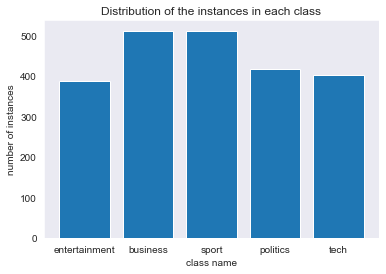

In [65]:
x = np.array(data_x)
y = np.array(data_y)
plt.title("Distribution of the instances in each class")
plt.xlabel("class name")
plt.ylabel("number of instances")
plt.bar(x,y)
plt.grid()
plt.show()